<a href="https://colab.research.google.com/github/ThiagoTrajanoDev/Analise-Dados-PRF/blob/main/An%C3%A1lise_de_infra%C3%A7%C3%B5es_de_tr%C3%A2nsito_em_Rodovias_Federais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de infrações de trânsito em Rodovias Federais**

---


###A análise em questão será realizada com os dados a Polícia Rodoviária Federal (PRF), que são encontrados em seu portal de [dados abertos](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf). Os utilizados aqui contém as infrações de trânsito em rodovidas federais em todo o ano de 2021.



###Para começar com as análises de dados, primeiramente se faz necessário importar as bibliotecas que serão utilizadas.






In [24]:
import pandas as pd
import requests 
import zipfile as z
import matplotlib.pyplot as plt
import locale


In [25]:
import os

!locale-gen pt_BR.UTF-8


Generating locales (this might take a while)...
  pt_BR.UTF-8... done
Generation complete.



###Após isso, abaixo realizamos uma serie de passos que tornam possível a importação e utilização dos dados:
> + Armazenamos o link usado para importação em uma variável "url";
> + Armazenamos em uma variável "response" uma requisição do tipo GET usando a biblioteca *requests* do python;
> + Criamos um arquivo "prf_data.zip" com os dados recebidos da requisição;
> + Extraimos os arquivos utilizando a biblioteca *zipfile* do pyhton;


In [26]:
url = 'https://drive.google.com/uc?export=download&id=1kgHHk0lurTuu4ZEn4Vhfo5W0ejOvDnZJ&confirm=t&uuid=1e9427b1-5e9d-4910-91c0-f2b424b9c745&at=ALgDtsyM-tCeZyX-PIasrxgQ0m_N:1678484309557'
response = requests.get(url)
write_files = open("prf_data.zip", "wb").write(response.content)
extract_data = z.ZipFile('prf_data.zip').extractall()



### O arquivo com os dados contém 12 documentos .csv, sendo cada um a representação de um mês do ano. A partir deles criaremos o nosso primeiro DataFrame seguindo os seguintes passos:
> + Criar um DataFrame vazio chamado de "prf_data";
> + Iterando pela lista "files",que contém o nome de cada arquivo, lemos cada arquivo de forma individual e usamos a função "concat()" da biblioteca *pandas* para juntar os 12 arquivos no DataFrame "prf_data" através de compreensão de lista.

In [39]:
prf_data = pd.DataFrame
files = z.ZipFile('prf_data.zip').namelist()
prf_data = pd.concat([pd.read_csv(file,sep=';',encoding = 'unicode_escape',low_memory=False) for file in files])
prf_data.head()


,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Indicador Veiculo Estrangeiro,Sentido Trafego,UF Infração,BR Infração,Km Infração,Município,...,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Descrição Especie Veículo,Descrição Marca Veículo,Hora Infração,Medição Considerada,Excesso Verificado,Qtd Infrações
0,106198fa7cfe8e9,2021-01-08,S,N,N,C,ES,101,242,SERRA,...,209,2016-11-01,NaN,Nenhuma,TRAÇÃO,VOLVO,1,0,0,1
1,12963b279370873,2021-01-08,S,N,N,D,ES,101,242,SERRA,...,209,2016-11-01,NaN,Nenhuma,TRAÇÃO,VOLVO,16,0,0,1
2,6b7a329810761b4,2021-01-10,S,N,N,C,ES,101,242,SERRA,...,209,2016-11-01,NaN,Nenhuma,TRAÇÃO,OUTRA,7,0,0,1
3,a866e8850da632b,2021-01-11,S,N,N,C,ES,101,242,SERRA,...,209,2016-11-01,NaN,Nenhuma,MISTO,OUTRA,19,0,0,1
4,77bf454bcb08f99,2021-01-12,S,N,N,D,ES,101,242,SERRA,...,209,2016-11-01,NaN,Nenhuma,CARGA,MERCEDES BENZ,11,0,0,1


## Com os dados já importados, podemos começar a análise.
####Primeiramente responderemos três perguntas:
> + Quantas infrações ocorreram em cada mês?
> + Quantas variáveis cada conjunto de dados registra?
> + Quais as cinco cidades brasileiras em que mais ocorreram infrações em rodovias federais?


### 1 - Para descobrir quantas infrações ocorreram em cada mês realizamos os seguintes passos: 
> +  Criar um nova coluna no dataframe, fatiando o mês de cada data e transformando em um número inteiro de 1 a 12 (Jan-Dez);
> + Agrupar cada mês da nova coluna criada com a soma da quantidade de infrações para cada um e assim descobrindo o total de infrações;

In [28]:
prf_data['Mês'] = prf_data['Data da Infração (DD/MM/AAAA)'].str[5:7]
prf_data['Mês'] = prf_data['Mês'].astype('int32')

In [29]:
ifr_per_mes = prf_data.groupby('Mês')['Qtd Infrações'].sum()
ifr_per_mes = pd.DataFrame(ifr_per_mes)
ifr_per_mes = ifr_per_mes.reset_index()
ifr_per_mes

,Mês,Qtd Infrações
0,1,442458
1,2,441593
2,3,380688
3,4,374764
4,5,412057
5,6,456576
6,7,470598
7,8,496155
8,9,503323
9,10,477682


> + A partir dos dados obtidos podemos criar um gráfico de barras com a biblioteca *Matplotlib* do pyhton para facilitar a vizualização dos dados;



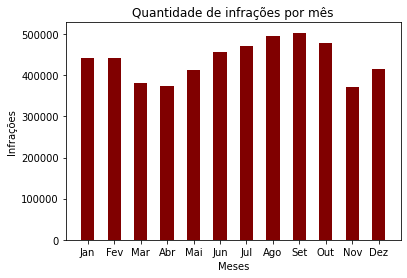

In [30]:
plt.bar(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'], ifr_per_mes['Qtd Infrações'], color ='maroon',
        width = 0.5)
plt.xlabel('Meses')
plt.ylabel('Infrações')
plt.title('Quantidade de infrações por mês')
plt.show()

###Podemos concluir que o mês com mais infrações foi Setembro e o com menos infrações foi Novembro
---

### 2 - Para verficar quantas variáveis o conjunto de dados registra basta apenas usar o método *info()*, originalmente possui 22 variáveis, agora 23 com a adição da coluna de meses

In [31]:
prf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241299 entries, 0 to 414770
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Número do Auto                 object 
 1   Data da Infração (DD/MM/AAAA)  object 
 2   Indicador de Abordagem         object 
 3   Assinatura do Auto             object 
 4   Indicador Veiculo Estrangeiro  object 
 5   Sentido Trafego                object 
 6   UF Infração                    object 
 7   BR Infração                    int64  
 8   Km Infração                    int64  
 9   Município                      object 
 10  Código da Infração             int64  
 11  Descrição Abreviada Infração   object 
 12  Enquadramento da Infração      object 
 13  Início Vigência da Infração    object 
 14  Fim Vigência Infração          float64
 15  Medição Infração               object 
 16  Descrição Especie Veículo      object 
 17  Descrição Marca Veículo        object 
 18  Hor

---

###3 - Para descorbir quais são as 5 cidades brasileiras onde mais ocorrem infrações precisamos:
> + Agrupar por municipio com a soma da quantidade de infrações para cada um;
> + Ordenar de forma decrescente para obter as que possuem mais infrações.

In [32]:
infr_per_city = prf_data.groupby('Município')['Qtd Infrações'].sum()
cities_ranked = infr_per_city.sort_values(ascending=False) 
cities_ranked = pd.DataFrame(cities_ranked)
cities_ranked = cities_ranked.reset_index()
cities_ranked.head()

,Município,Qtd Infrações
0,RIO DE JANEIRO,194011
1,NITEROI,173277
2,MAIRIPORA,136054
3,BELO HORIZONTE,124818
4,ITABORAI,112712


---

## Após obter essa informações a partir dos dados apresentados, iremos criar dois novos conjuntos de dados em arquivos separados, dados tais que representam:
> + Ranking de infrações por estado;
> + Infrações por dia da semana para o ano inteiro.

###1 - Para obter o ranking de infrações por estado devemos:
> + Agrupar por estado e somar com a quantidade de infrações de cada um;
> + Ordenar os valores com finalidadade de obter o ranking do maior para o menor;
> + Criar um arquivo .csv para criar um novo grupo de dados.

In [33]:
infr_per_state =  prf_data.groupby('UF Infração')['Qtd Infrações'].sum()
states_ranked = infr_per_state.sort_values(ascending=False)

In [34]:
states_ranked = pd.DataFrame(states_ranked)
states_ranked= states_ranked.reset_index()
states_ranked.columns = ['UF','Qtd Infrações']
states_ranked.to_csv('Ranking de infrações por estado.csv')
states_ranked


,UF,Qtd Infrações
0,RJ,925055
1,SP,700587
2,MG,685155
3,BA,462102
4,MS,361411
5,PR,258554
6,SC,235609
7,GO,209939
8,MT,185499
9,ES,181184


####Podemos concluir que o Rio de Janeiro possui a maior incidência de infrações e o Acre possui a menor
---

###2 - Para verificar a quantidade de infrações por dia da semana devemos:
>  + Transformar os valores contidos em "Data da Infração" de string para o tipo de data no pandas: *datetime*;
>  + Criar uma função que converte uma data em seu dia na semana (função "weekday");
>  + Aplicar essa função em todas as linhas da coluna "Data da Infração" e transformar cada data um dia da semana;

In [35]:
locale.setlocale(category = locale.LC_ALL, locale = 'pt_BR')
prf_data['Data da Infração (DD/MM/AAAA)'] = pd.to_datetime(prf_data['Data da Infração (DD/MM/AAAA)'])
def weekday(x):
  return x.strftime("%A")
prf_data['Dias'] = prf_data['Data da Infração (DD/MM/AAAA)'].apply(weekday)

> * O dataframe é organizado em ordem alfabética, para ordenar por dia da semana foram realizadas algumas alterações: 
>   * a inserção de uma coluna de referência para cada dia da semana e após isso a ordenação, remoção da coluna de referência e reindexação do DataFrame
 > * Após isso o novo grupo de dados foi salvo em um arquivo .csv chamado de "Infrações por dia da Semana.csv" 





In [36]:

week_days=prf_data.groupby('Dias')['Qtd Infrações'].sum()

In [37]:
infr_per_day = pd.DataFrame(week_days)
infr_per_day['Ref'] = [1,4,5,2,6,7,3]
infr_per_day= infr_per_day.reset_index()
infr_per_day = infr_per_day.sort_values(['Ref','Dias'])
infr_per_day = infr_per_day.reset_index()
infr_per_day = infr_per_day.drop(columns=['index','Ref'])
infr_per_day


,Dias,Qtd Infrações
0,domingo,760256
1,segunda,720175
2,terça,730309
3,quarta,732179
4,quinta,735974
5,sexta,818925
6,sábado,743481


In [38]:
infr_per_day.to_csv('Infrações por dia da Semana.csv')

---